# Drive

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# find current directory
cd /content/drive/MyDrive/Nomic

/content/drive/MyDrive/Nomic


In [ ]:
# hugging face
!pip install datasets[audio] librosa transformers

In [ ]:
# import libraries
import librosa
from datasets import load_dataset
from transformers import ClapAudioModelWithProjection, ClapProcessor

import pandas as pd
import numpy as np

# Common-Language Dataset

## Stream Load (Optional)

In [ ]:
# Streaming allows you to access and process the data in smaller chunks or batches
# rather than loading the entire dataset into memory at once.

# dataset = load_dataset("common_language", streaming=True)

In [ ]:
# dataset

IterableDatasetDict({
    train: IterableDataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'age', 'gender', 'language'],
        n_shards: 7
    })
    validation: IterableDataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'age', 'gender', 'language'],
        n_shards: 2
    })
    test: IterableDataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'age', 'gender', 'language'],
        n_shards: 2
    })
})

In [ ]:
# ds_head = dataset['train'].take(1)

In [ ]:
# example = list(ds_head)[-1]

In [ ]:
# example['audio']['array']

array([ 3.63797881e-11, -5.82076609e-11,  2.18278728e-11, ...,
        2.74835584e-05,  2.27012752e-05,  1.35751925e-05])

In [ ]:
# len(example['audio']['array'])

148608

In [ ]:
# example

{'client_id': 'ara_trn_sp_12',
 'path': '/storage/hf-datasets-cache/medium/datasets/60156081781751-config-parquet-and-info-common_language-90667c2a/downloads/extracted/989e48e9c1f0fcf0b8bd64354ad0be0cbc7f48a06364029204d3b74f95e0693d/common_voice_kpd/Arabic/train/ara_trn_sp_12/common_voice_ar_20401372.wav',
 'audio': {'path': 'common_voice_ar_20401372.wav',
  'array': array([ 3.63797881e-11, -5.82076609e-11,  2.18278728e-11, ...,
          2.74835584e-05,  2.27012752e-05,  1.35751925e-05]),
  'sampling_rate': 48000},
 'sentence': 'عليك أن تفي بوعدك.',
 'age': 'twenties',
 'gender': 'male',
 'language': 0}

## Load the Common_Language Dataset

In [ ]:
dataset = load_dataset("common_language")

Generating train split:   0%|          | 0/22194 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5888 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5963 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'age', 'gender', 'language'],
        num_rows: 22194
    })
    validation: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'age', 'gender', 'language'],
        num_rows: 5888
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'age', 'gender', 'language'],
        num_rows: 5963
    })
})

## Process Text Data

In [ ]:
# create dataframe
d = {'sentence': dataset['train']['sentence'],
     'age': dataset['train']['age'],
     'gender': dataset['train']['gender'],
     'language': dataset['train']['language']}

df = pd.DataFrame(d)

In [ ]:
# dictionary for mapping language to dataframe
dict_language = {
    0: "Arabic",
    1: "Basque",
    2: "Breton",
    3: "Catalan",
    4: "Chinese_China",
    5: "Chinese_Hongkong",
    6: "Chinese_Taiwan",
    7: "Chuvash",
    8: "Czech",
    9: "Dhivehi",
    10: "Dutch",
    11: "English",
    12: "Esperanto",
    13: "Estonian",
    14: "French",
    15: "Frisian",
    16: "Georgian",
    17: "German",
    18: "Greek",
    19: "Hakha_Chin",
    20: "Indonesian",
    21: "Interlingua",
    22: "Italian",
    23: "Japanese",
    24: "Kabyle",
    25: "Kinyarwanda",
    26: "Kyrgyz",
    27: "Latvian",
    28: "Maltese",
    29: "Mangolian",
    30:"Persian",
    31: "Polish",
    32: "Portuguese",
    33: "Romanian",
    34: "Romansh_Sursilvan",
    35: "Russian",
    36: "Sakha",
    37: "Slovenian",
    38: "Spanish",
    39: "Swedish",
    40: "Tamil",
    41: "Tatar",
    42: "Turkish",
    43: "Ukranian",
    44: "Welsh",
}

In [ ]:
# mapping
df['language']= df['language'].apply(lambda x: dict_language[x])

In [ ]:
# sanity check
df.head()

,sentence,age,gender,language
0,عليك أن تفي بوعدك.,twenties,male,Arabic
1,يشبه أباه.,twenties,female,Arabic
2,لن يُغَيِّرَ ذلك شيئًا.,fourties,male,Arabic
3,كيف حال الجميع ؟,not_defined,not_defined,Arabic
4,أتعرف كيف تلعب الشطرنج ؟,not_defined,not_defined,Arabic


In [ ]:
# # save as csv for ease of access
# df.to_csv('text.csv', index=False)

## Encoding - Hugging Face Encoder

In [ ]:
pip install -U sentence-transformers

In [ ]:
# compute sentence / text embeddings for more than 100 languages
# https://www.sbert.net/

from sentence_transformers import SentenceTransformer

In [ ]:
# load model from hugging face
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

In [ ]:
# create embeddings for the sentences in the dataset
sent_embedding = model.encode(df['sentence'])

In [ ]:
# # pickle
# import pickle
# filename = "/content/drive/MyDrive/Nomic/nomic_sentence_embedding.pkl"
# with open(filename,'rb') as file_handle:
#     sent_embedding = pickle.load(file_handle)

In [ ]:
# check
sent_embedding

array([[ 0.01371459,  0.42704064, -0.01302591, ...,  0.01901572,
        -0.06876358, -0.08333968],
       [-0.09278919,  0.03534319, -0.00954686, ...,  0.15854986,
        -0.06618368, -0.07107498],
       [ 0.05816522,  0.25467697, -0.01867621, ...,  0.03930706,
        -0.04150001, -0.10202517],
       ...,
       [ 0.04657907, -0.09228363, -0.01534123, ...,  0.0239055 ,
         0.01351727, -0.09932388],
       [-0.04384496,  0.20056073, -0.02005742, ...,  0.02426172,
        -0.01775688, -0.08732177],
       [-0.07222664, -0.00213803, -0.01906584, ...,  0.07778874,
        -0.1425921 , -0.03952584]], dtype=float32)

# Nomic Atlas

Description: This repository contains Python bindings for working with Nomic Atlas, the world’s most powerful unstructured data interaction platform. Atlas supports datasets from hundreds to tens of millions of points, and supports data modalities ranging from text to image to audio to video. [More info](https://github.com/nomic-ai/nomic?tab=readme-ov-file).

In [ ]:
pip install nomic

In [ ]:
# login with api-key
!nomic login nk-nNcXtWCkIc3lh8Igi_L1BG6Xi9pIyyWABAVhtr3FtZY

In [ ]:
from nomic import atlas

In [ ]:
# dataframe needs to be reformatted as dict
reformatted = df.to_dict('records')

In [ ]:
# create atlas mapping
project = atlas.map_data(data=reformatted,
                         embeddings = sent_embedding,
                         identifier='Sentences Languages Revised',
                         description='Sentences Languages.',
                         topic_model={'topic_label_field': 'language'}
                         )

2024-02-17 20:21:18.622 | INFO     | nomic.dataset:_create_project:861 - Creating dataset `sentences-languages-revised`
2024-02-17 20:21:18.919 | INFO     | nomic.atlas:map_data:108 - Uploading data to Atlas.
5it [00:02,  2.16it/s]                       
2024-02-17 20:21:21.646 | INFO     | nomic.dataset:_add_data:1529 - Upload succeeded.
2024-02-17 20:21:21.653 | INFO     | nomic.atlas:map_data:123 - `lijeff/sentences-languages-revised`: Data upload succeeded to dataset`
2024-02-17 20:21:22.700 | INFO     | nomic.dataset:create_index:1238 - Created map `Sentences Languages Revised` in dataset `lijeff/sentences-languages-revised`: https://atlas.nomic.ai/data/lijeff/sentences-languages-revised/map


[Final Results](https://atlas.nomic.ai/data/lijeff/sentences-languages-revised/map)


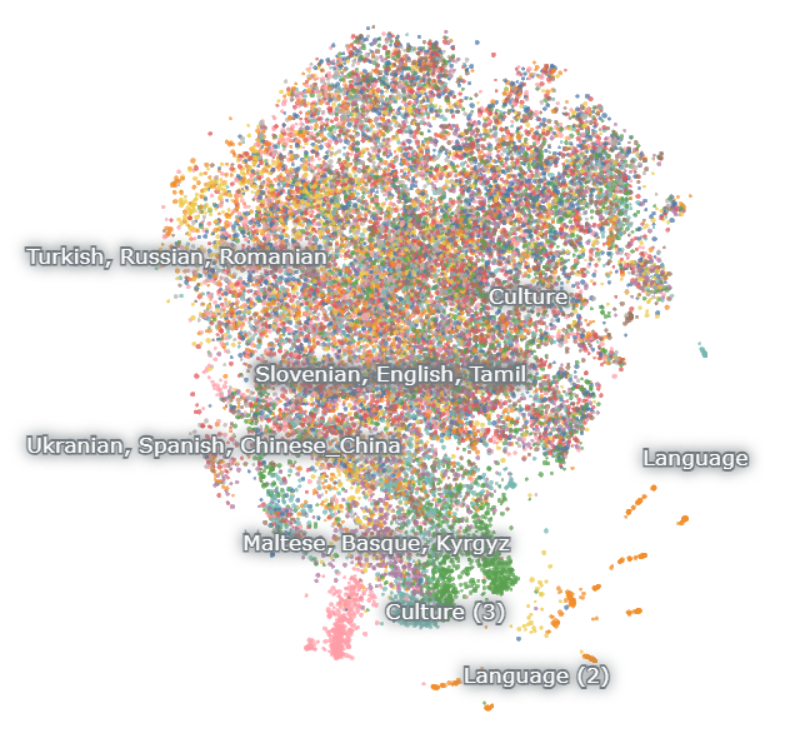